In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme(font_scale=1.2)

In [2]:
full_data_path = "../data/processed/user_ratings_full.csv"
reduced_data_path = "../data/processed/user_ratings_train_100K.csv"
test_data_path = "../data/processed/user_ratings_test_100K.csv"

print(f"Full data exists: {Path(full_data_path).exists()}")
print(f"Reduced data exists: {Path(reduced_data_path).exists()}")
print(f"Test data exists: {Path(test_data_path).exists()}")

full_df = pd.read_csv(full_data_path)
train_df = pd.read_csv(reduced_data_path)
test_df = pd.read_csv(test_data_path)

reduced_df = pd.concat([train_df, test_df], ignore_index=True)

Full data exists: True
Reduced data exists: True
Test data exists: True


In [3]:
print("\n===== Dataset Size Comparison =====")
print(f"Original dataset: {len(full_df)} ratings")
print(f"Reduced dataset: {len(reduced_df)} ratings ({len(reduced_df)/len(full_df)*100:.2f}% of original)")
print(f"Training set: {len(train_df)} ratings ({len(train_df)/len(reduced_df)*100:.2f}% of reduced)")
print(f"Test set: {len(test_df)} ratings ({len(test_df)/len(reduced_df)*100:.2f}% of reduced)")


===== Dataset Size Comparison =====
Original dataset: 17561286 ratings
Reduced dataset: 100000 ratings (0.57% of original)
Training set: 81142 ratings (81.14% of reduced)
Test set: 18858 ratings (18.86% of reduced)


In [4]:
print("\n===== Users and Items =====")
full_users = full_df['UserId'].nunique()
full_items = full_df['BGGId'].nunique()
reduced_users = reduced_df['UserId'].nunique()
reduced_items = reduced_df['BGGId'].nunique()

print(f"Original dataset: {full_users} users, {full_items} items")
print(f"Reduced dataset: {reduced_users} users ({reduced_users/full_users*100:.2f}% of original), "
      f"{reduced_items} items ({reduced_items/full_items*100:.2f}% of original)")

full_sparsity = 1 - (len(full_df) / (full_users * full_items))
reduced_sparsity = 1 - (len(reduced_df) / (reduced_users * reduced_items))

print(f"\nSparsity (original): {full_sparsity:.6f} ({full_sparsity*100:.2f}%)")
print(f"Sparsity (reduced): {reduced_sparsity:.6f} ({reduced_sparsity*100:.2f}%)")


===== Users and Items =====
Original dataset: 168961 users, 21924 items
Reduced dataset: 960 users (0.57% of original), 11879 items (54.18% of original)

Sparsity (original): 0.995259 (99.53%)
Sparsity (reduced): 0.991231 (99.12%)


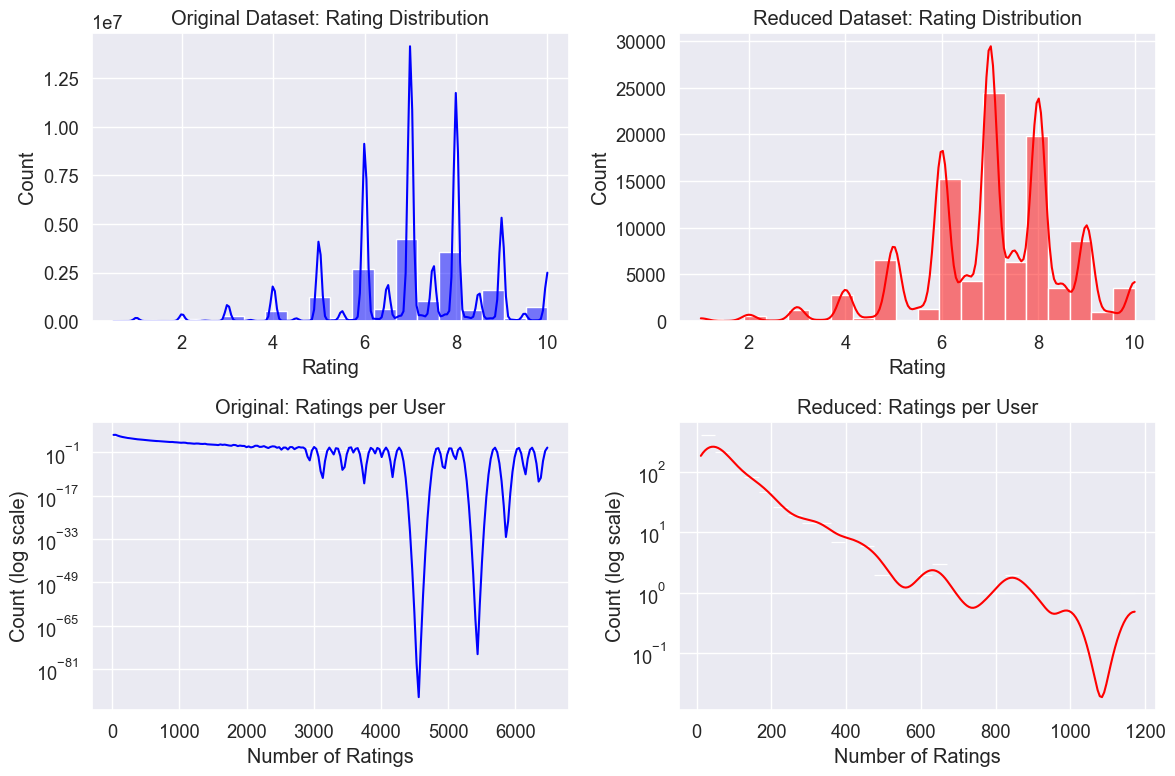

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(full_df['Rating'], bins=20, kde=True, color='blue')
plt.title('Original Dataset: Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(reduced_df['Rating'], bins=20, kde=True, color='red')
plt.title('Reduced Dataset: Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# User rating counts
plt.subplot(2, 2, 3)
full_user_counts = full_df['UserId'].value_counts()
reduced_user_counts = reduced_df['UserId'].value_counts()

sns.histplot(full_user_counts, bins=30, kde=True, color='blue', log_scale=(False, True))
plt.title('Original: Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count (log scale)')

plt.subplot(2, 2, 4)
sns.histplot(reduced_user_counts, bins=30, kde=True, color='red', log_scale=(False, True))
plt.title('Reduced: Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count (log scale)')

plt.tight_layout()
plt.show()

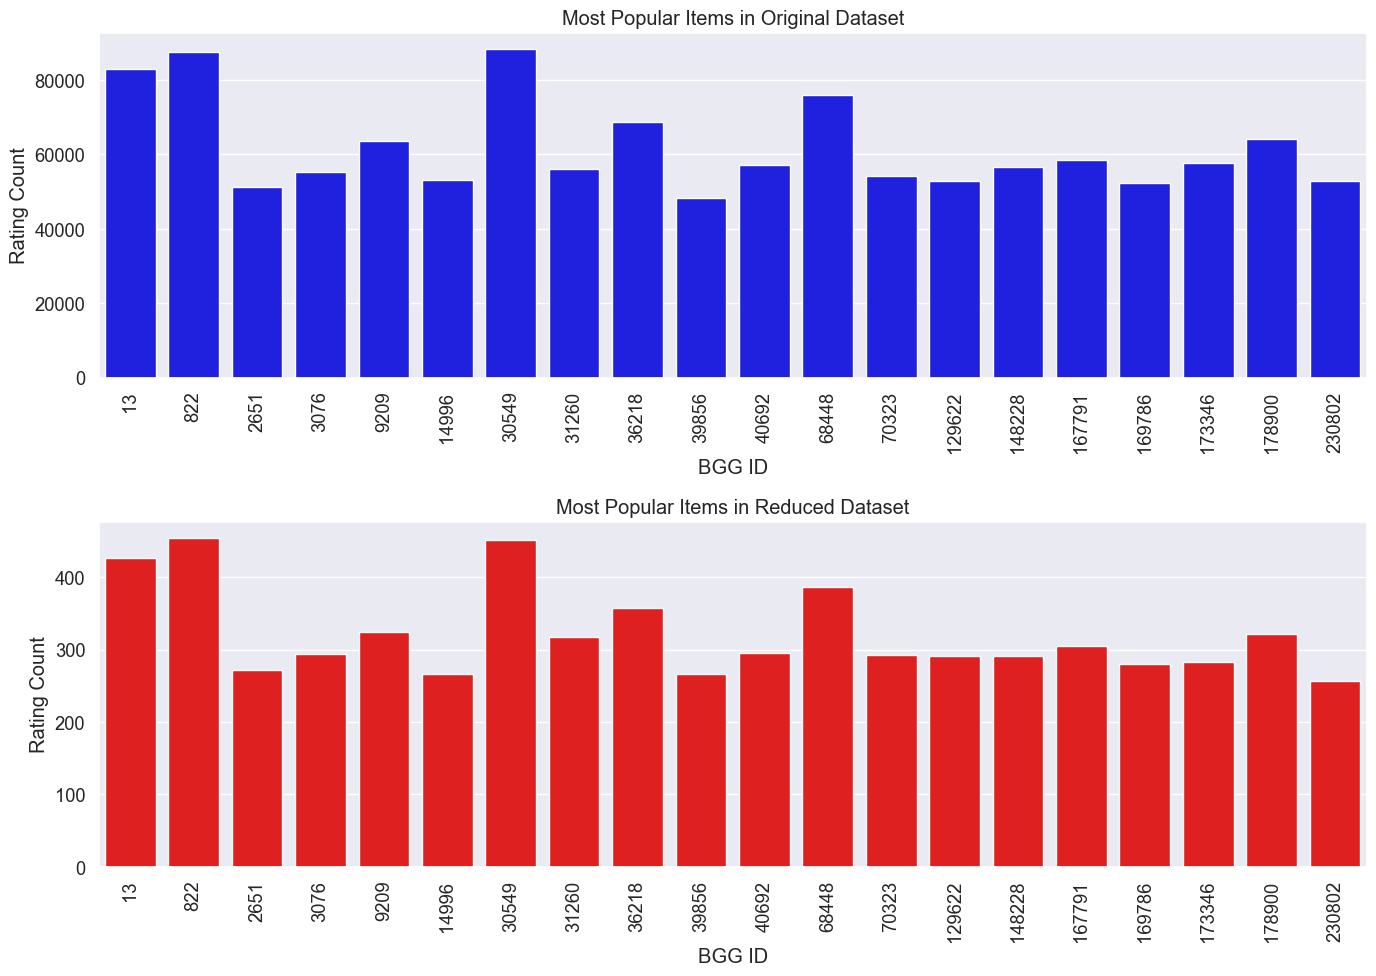

In [6]:
full_item_counts = full_df['BGGId'].value_counts()
reduced_item_counts = reduced_df['BGGId'].value_counts()

full_top_items = full_item_counts.head(20)
reduced_top_items = reduced_item_counts.head(20)

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=full_top_items.index, y=full_top_items.values, color='blue')
plt.title('Most Popular Items in Original Dataset')
plt.xlabel('BGG ID')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.barplot(x=reduced_top_items.index, y=reduced_top_items.values, color='red')
plt.title('Most Popular Items in Reduced Dataset')
plt.xlabel('BGG ID')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [7]:
common_users = set(full_df['UserId'].unique()) & set(reduced_df['UserId'].unique())
common_items = set(full_df['BGGId'].unique()) & set(reduced_df['BGGId'].unique())

print("\n===== Overlap Analysis =====")
print(f"Users in common: {len(common_users)} ({len(common_users)/full_users*100:.2f}% of original users)")
print(f"Items in common: {len(common_items)} ({len(common_items)/full_items*100:.2f}% of original items)")


===== Overlap Analysis =====
Users in common: 960 (0.57% of original users)
Items in common: 11879 (54.18% of original items)


In [8]:
print("\n===== Rating Statistics =====")
print(f"Original dataset mean rating: {full_df['Rating'].mean():.4f}, median: {full_df['Rating'].median():.1f}")
print(f"Reduced dataset mean rating: {reduced_df['Rating'].mean():.4f}, median: {reduced_df['Rating'].median():.1f}")
print(f"Training set mean rating: {train_df['Rating'].mean():.4f}, median: {train_df['Rating'].median():.1f}")
print(f"Test set mean rating: {test_df['Rating'].mean():.4f}, median: {test_df['Rating'].median():.1f}")


===== Rating Statistics =====
Original dataset mean rating: 7.0668, median: 7.0
Reduced dataset mean rating: 7.0701, median: 7.0
Training set mean rating: 7.0621, median: 7.0
Test set mean rating: 7.1044, median: 7.0


In [9]:
unique_train_users = set(train_df['UserId'].unique())
unique_test_users = set(test_df['UserId'].unique())
users_in_both = unique_train_users & unique_test_users

print("\n===== Train-Test Split Analysis =====")
print(f"Users only in training: {len(unique_train_users - unique_test_users)}")
print(f"Users only in test: {len(unique_test_users - unique_train_users)}")
print(f"Users in both training and test: {len(users_in_both)} ({len(users_in_both)/reduced_users*100:.2f}% of reduced users)")


===== Train-Test Split Analysis =====
Users only in training: 75
Users only in test: 0
Users in both training and test: 885 (92.19% of reduced users)


In [10]:
items_in_train = set(train_df['BGGId'].unique())
items_in_test = set(test_df['BGGId'].unique())
items_in_both = items_in_train & items_in_test

print(f"\nItems only in training: {len(items_in_train - items_in_test)}")
print(f"Items only in test: {len(items_in_test - items_in_train)}")
print(f"Items in both: {len(items_in_both)} ({len(items_in_both)/reduced_items*100:.2f}% of reduced items)")


Items only in training: 7189
Items only in test: 0
Items in both: 4690 (39.48% of reduced items)


In [11]:
cold_start_users = len(unique_test_users - unique_train_users)
cold_start_items = len(items_in_test - items_in_train)

print(f"\nCold start users (only in test set): {cold_start_users} ({cold_start_users/len(unique_test_users)*100:.2f}% of test users)")
print(f"Cold start items (only in test set): {cold_start_items} ({cold_start_items/len(items_in_test)*100:.2f}% of test items)")


Cold start users (only in test set): 0 (0.00% of test users)
Cold start items (only in test set): 0 (0.00% of test items)


In [12]:
print("\n===== Recommendation System Metrics =====")
print(f"User-Item matrix size: {reduced_users} × {reduced_items} = {reduced_users*reduced_items} cells")
print(f"Filled cells: {len(reduced_df)} ratings")
print(f"Sparsity: {reduced_sparsity:.6f} ({reduced_sparsity*100:.2f}%)")
print(f"Density: {(1-reduced_sparsity)*100:.4f}%")
print(f"Avg ratings per user: {len(reduced_df)/reduced_users:.2f}")
print(f"Avg ratings per item: {len(reduced_df)/reduced_items:.2f}")


===== Recommendation System Metrics =====
User-Item matrix size: 960 × 11879 = 11403840 cells
Filled cells: 100000 ratings
Sparsity: 0.991231 (99.12%)
Density: 0.8769%
Avg ratings per user: 104.17
Avg ratings per item: 8.42


In [13]:
user_rating_counts = train_df.groupby('UserId').size().sort_values(ascending=False)
user_rating_counts.tail(100)

UserId
127795    20
127274    20
102800    20
101668    20
145983    20
          ..
134496    15
72692     14
252335    13
168006    13
273242    11
Length: 100, dtype: int64


===== Rating Distribution Statistics =====
Original Dataset:
Mean ratings per user: 103.94
Median ratings per user: 56.00
Min: 20, Max: 6478

Reduced Dataset:
Mean ratings per user: 104.17
Median ratings per user: 61.00
Min: 11, Max: 1172


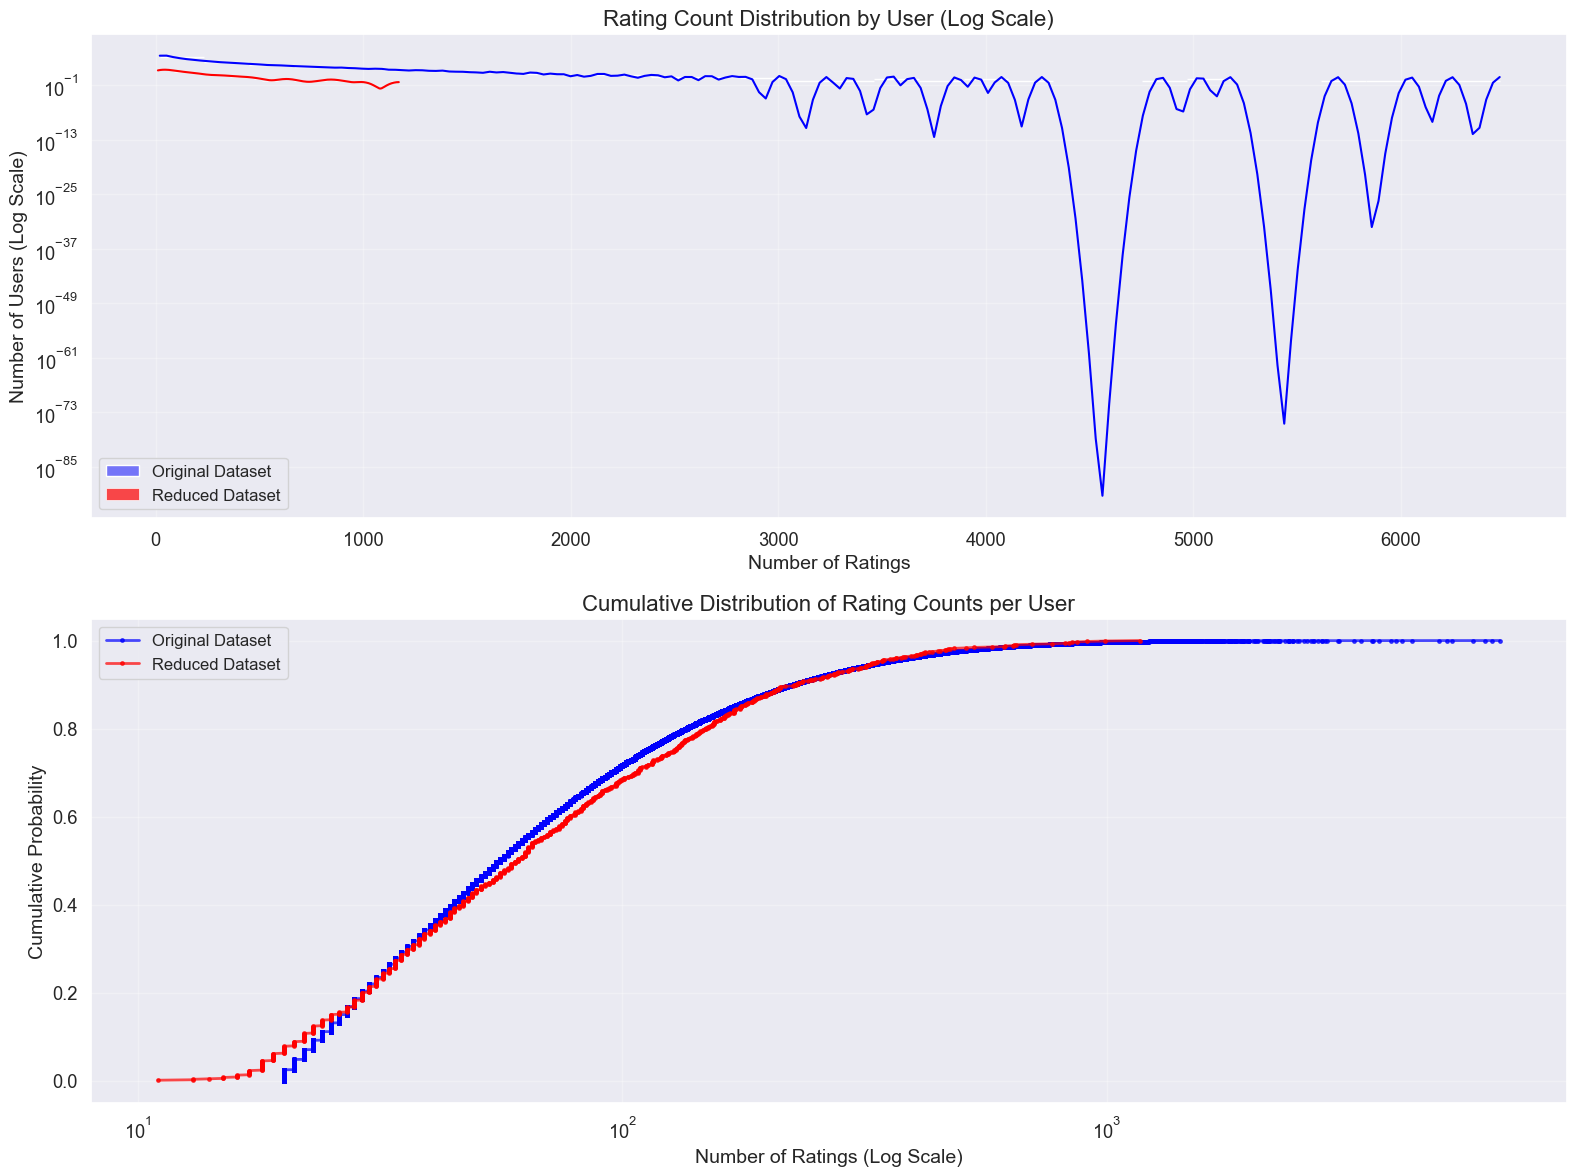

In [14]:
plt.figure(figsize=(16, 12))

full_user_rating_counts = full_df.groupby('UserId').size()
reduced_user_rating_counts = reduced_df.groupby('UserId').size()

plt.subplot(2, 1, 1)
sns.histplot(full_user_rating_counts, bins=30, kde=True, color='blue',
             log_scale=(False, True), label='Original Dataset')
sns.histplot(reduced_user_rating_counts, bins=30, kde=True, color='red',
             alpha=0.7, log_scale=(False, True), label='Reduced Dataset')
plt.title('Rating Count Distribution by User (Log Scale)', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Number of Users (Log Scale)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

x1, y1 = ecdf(full_user_rating_counts)
x2, y2 = ecdf(reduced_user_rating_counts)

plt.plot(x1, y1, marker='.', linestyle='-', linewidth=2, markersize=5,
         color='blue', alpha=0.7, label='Original Dataset')
plt.plot(x2, y2, marker='.', linestyle='-', linewidth=2, markersize=5,
         color='red', alpha=0.7, label='Reduced Dataset')
plt.xscale('log')
plt.title('Cumulative Distribution of Rating Counts per User', fontsize=16)
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

print("\n===== Rating Distribution Statistics =====")
print("Original Dataset:")
print(f"Mean ratings per user: {full_user_rating_counts.mean():.2f}")
print(f"Median ratings per user: {full_user_rating_counts.median():.2f}")
print(f"Min: {full_user_rating_counts.min()}, Max: {full_user_rating_counts.max()}")

print("\nReduced Dataset:")
print(f"Mean ratings per user: {reduced_user_rating_counts.mean():.2f}")
print(f"Median ratings per user: {reduced_user_rating_counts.median():.2f}")
print(f"Min: {reduced_user_rating_counts.min()}, Max: {reduced_user_rating_counts.max()}")

plt.tight_layout()
plt.show()